In [5]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data = yf.download(['AMZN', 'NVDA', '^GSPC'], start='2020-01-01', end='2020-06-01')['Adj Close']
data

[*********************100%%**********************]  3 of 3 completed


,AMZN,NVDA,^GSPC
Date,,,
2020-01-02,94.900497,59.749294,3257.850098
2020-01-03,93.748497,58.792942,3234.850098
2020-01-06,95.143997,59.039505,3246.280029
2020-01-07,95.343002,59.754272,3237.179932
2020-01-08,94.598503,59.866344,3253.050049
...,...,...,...
2020-05-22,121.844002,89.972839,2955.449951
2020-05-26,121.093002,86.897751,2991.770020
2020-05-27,120.519501,84.978928,3036.129883


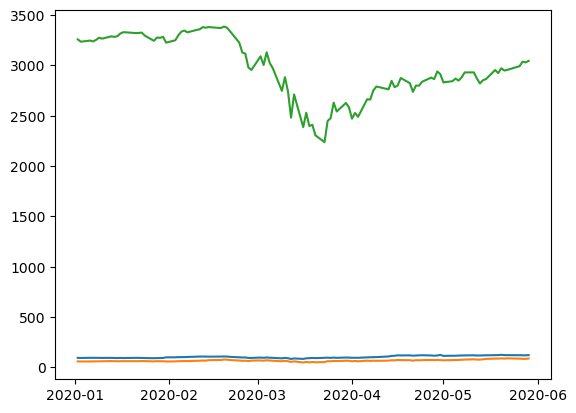

In [7]:
plt.plot(data)

In [26]:
def computeBeta(data, stock, market):
    rets = np.log(data / data.shift(1))
    cov = rets.cov() * 252
    covWmarket = cov.loc[stock, market]
    marketVar = rets[market].var() * 252
    return covWmarket / marketVar
    
def computeCAPM(data, stock, market, riskFree = .025, riskPremium = 'market'):
    rets = np.log(data / data.shift(1))
    
    if riskPremium == 'market':
        riskPremium = (rets[market].mean() * 252) - riskFree
    beta = computeBeta(data, stock, market)
    return riskFree + beta * riskPremium

def computeSharpe(data, stock, market, riskFree = .025, riskPremium = 'market'):
    rets = np.log(data / data.shift(1))
    ret = computeCAPM(data, stock, market, riskFree = .025, riskPremium = 'market')
    return (ret - riskFree) / (rets[stock].std() * 250 ** .5)

def stockCAPM(data, stock, market, riskFree = .025, riskPremium = 'market'):
    beta = computeBeta(data, stock, market)
    capm = computeCAPM(data, stock, market, riskFree, riskPremium)
    sharpe = computeSharpe(data, stock, market, riskFree, riskPremium)
    
    capmData = pd.DataFrame([beta, capm, sharpe], columns=[stock], index=['Beta', 'CAPM', 'Sharpe'])
    return capmData.T

In [27]:
stockCAPM(data, 'AMZN', '^GSPC')

,Beta,CAPM,Sharpe
AMZN,0.590357,-0.088637,-0.265774


In [28]:
stockCAPM(data, 'NVDA', '^GSPC')

,Beta,CAPM,Sharpe
NVDA,1.32962,-0.230937,-0.336515
